## setting up

In [1]:
# connect gcp
from google.colab import auth
from google.cloud import bigquery

In [109]:
# packages/libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import MultipleLocator


In [3]:
# setup pandas
pd.set_option('display.max_columns', None)

### connect to BigQuery

Authenticate user for accessing BigQuery



In [4]:
auth.authenticate_user()

#### BigQuery Client

In [7]:
# bigquery table ref
project_id = 'dev-exa-412407'
dataset_id = 'breast_cancer'
table_id = 'breast_cancer'

In [8]:
try:
  client = bigquery.Client(project=project_id)
  print("BigQuery client successfully created!\n", client)
except Exception as e:
  # Handle the exception
  print(f"An error occurred: {e}")

BigQuery client successfully created!


## import data to dataframe

In [11]:
# create dataframe from bigquery table
try:
    query = f"SELECT * FROM `{project_id}.{dataset_id}.{table_id}`"
    df = client.query(query).to_dataframe()

    print("Query executed successfully. DataFrame created.")

except Exception as e:
    print(f"An error occurred: {e}")
    df = None

Query executed successfully. DataFrame created.


## check dataframe

In [13]:
# first 10 rows of dataframe
df.head(10)

,study_id,patient_id,sample_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_claudin_low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival_status,pr_status,radio_therapy,relapse_free_status_months,relapse_free_status,number_of_samples_per_patient,sample_type,sex,3_gene_classifier_subtype,tmb_nonsynonymous,tumor_size,tumor_stage,patient_vital_status
0,brca_metabric,MB-0025,MB-0025,76.24,None,Breast Cancer,Breast Invasive Ductal Carcinoma,None,None,None,1.0,Positve,Positive,3.0,None,None,Ductal/NST,None,None,None,None,11.0,5.0,6.68,IDC,NaN,None,None,None,126.32,1:Recurred,1,Primary,Female,None,6.537589,34.0,2.0,None
1,brca_metabric,MB-0326,MB-0326,51.45,None,Breast Cancer,Invasive Breast Carcinoma,None,None,None,1.0,Positve,Positive,2.0,None,None,None,None,None,None,None,1.0,9.0,4.24,BRCA,NaN,None,None,None,191.25,0:Not Recurred,1,Primary,Female,None,11.767659,12.0,2.0,None
2,brca_metabric,MB-0329,MB-0329,76.84,None,Breast Cancer,Breast Invasive Ductal Carcinoma,None,None,None,1.0,Positve,Positive,3.0,None,None,Ductal/NST,None,None,None,None,3.0,5.0,5.06,IDC,NaN,None,None,None,25.63,0:Not Recurred,1,Primary,Female,None,6.537589,30.0,2.0,None
3,brca_metabric,MB-0547,MB-0547,66.73,None,Breast Cancer,Invasive Breast Carcinoma,None,None,None,1.0,Positve,Positive,2.0,None,None,None,None,None,None,None,0.0,2.0,4.48,BRCA,NaN,None,None,None,185.46,0:Not Recurred,1,Primary,Female,None,2.615035,25.0,2.0,None
4,brca_metabric,MTS-T0035,MTS-T0035,55.64,None,Breast Cancer,Breast Invasive Ductal Carcinoma,None,None,None,1.0,Positve,Positive,2.0,None,None,Ductal/NST,None,None,None,None,0.0,3.0,NaN,IDC,NaN,None,None,None,64.67,0:Not Recurred,1,Primary,Female,None,3.922553,13.0,NaN,None
5,brca_metabric,MTS-T0058,MTS-T0058,48.00,None,Breast Cancer,Breast Invasive Ductal Carcinoma,None,None,None,9.0,None,None,3.0,None,None,Ductal/NST,None,None,None,None,1.0,4.0,2.62,IDC,NaN,None,None,None,59.31,0:Not Recurred,1,Primary,Female,None,5.230071,31.0,2.0,None
6,brca_metabric,MTS-T0059,MTS-T0059,82.00,None,Breast Cancer,Breast Invasive Ductal Carcinoma,None,None,None,9.0,None,None,2.0,None,None,Ductal/NST,None,None,None,None,0.0,8.0,1.48,IDC,NaN,None,None,None,49.34,0:Not Recurred,1,Primary,Female,None,10.460142,24.0,2.0,None
7,brca_metabric,MTS-T0060,MTS-T0060,61.00,None,Breast Cancer,Invasive Breast Carcinoma,None,None,None,9.0,None,None,3.0,None,None,None,None,None,None,None,0.0,6.0,1.98,BRCA,NaN,None,None,None,23.49,1:Recurred,1,Primary,Female,None,7.845106,49.0,2.0,None
8,brca_metabric,MTS-T0061,MTS-T0061,60.00,None,Breast Cancer,Breast Invasive Ductal Carcinoma,None,None,None,9.0,None,None,3.0,None,None,Ductal/NST,None,None,None,None,0.0,6.0,1.38,IDC,NaN,None,None,None,67.80,0:Not Recurred,1,Primary,Female,None,7.845106,19.0,1.0,None
9,brca_metabric,MTS-T0062,MTS-T0062,58.00,None,Breast Cancer,Breast Invasive Ductal Carcinoma,None,None,None,9.0,None,None,3.0,None,None,Ductal/NST,None,None,None,None,3.0,10.0,2.40,IDC,NaN,None,None,None,65.76,0:Not Recurred,1,Primary,Female,None,13.075177,20.0,2.0,None


In [14]:
# last 10 rows of dataframe
df.tail(10)

,study_id,patient_id,sample_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_claudin_low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival_status,pr_status,radio_therapy,relapse_free_status_months,relapse_free_status,number_of_samples_per_patient,sample_type,sex,3_gene_classifier_subtype,tmb_nonsynonymous,tumor_size,tumor_stage,patient_vital_status
2499,brca_metabric,MB-2929,MB-2929,53.31,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,None,YES,Her2,2.0,Negative,Negative,2.0,NEUTRAL,Negative,Ductal/NST,NO,Post,4ER-,Left,1.0,6.0,4.040,IDC,262.866667,1:DECEASED,Negative,YES,259.41,0:Not Recurred,1,Primary,Female,ER-/HER2-,7.845106,20.0,2.0,Died of Other Causes
2500,brca_metabric,MB-3582,MB-3582,63.97,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,claudin-low,2.0,Negative,Positive,NaN,NEUTRAL,Negative,Ductal/NST,NO,Post,4ER-,Right,0.0,2.0,1.120,IDC,229.366667,1:DECEASED,Positive,NO,226.35,0:Not Recurred,1,Primary,Female,ER-/HER2-,2.615035,60.0,1.0,Died of Other Causes
2501,brca_metabric,MB-4303,MB-4303,66.91,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,NO,Basal,3.0,Negative,Negative,3.0,NEUTRAL,Negative,Ductal/NST,NO,Post,4ER-,Left,0.0,12.0,4.030,IDC,89.033333,1:DECEASED,Negative,YES,87.86,0:Not Recurred,1,Primary,Female,None,15.690212,15.0,1.0,Died of Other Causes
2502,brca_metabric,MB-4667,MB-4667,65.58,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,NO,Her2,3.0,Negative,Negative,3.0,NEUTRAL,Negative,Lobular,NO,Post,4ER-,Left,0.0,41.0,4.040,ILC,295.333333,1:DECEASED,Negative,YES,291.45,0:Not Recurred,1,Primary,Female,ER-/HER2-,52.300708,20.0,1.0,Died of Other Causes
2503,brca_metabric,MB-5209,MB-5209,79.17,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,NO,Basal,3.0,Negative,Negative,3.0,NEUTRAL,Negative,Ductal/NST,YES,Post,4ER-,Right,0.0,6.0,4.120,IDC,175.100000,1:DECEASED,Negative,YES,172.80,0:Not Recurred,1,Primary,Female,ER-/HER2-,7.845106,60.0,2.0,Died of Other Causes
2504,brca_metabric,MB-5441,MB-5441,90.08,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,NO,Her2,3.0,Negative,Negative,3.0,GAIN,Positive,Ductal/NST,YES,Post,4ER-,Right,0.0,12.0,4.070,IDC,9.700000,1:DECEASED,Negative,NO,9.57,0:Not Recurred,1,Primary,Female,ER+/HER2- Low Prolif,15.690212,35.0,3.0,Died of Other Causes
2505,brca_metabric,MB-5652,MB-5652,68.75,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,NO,Normal,3.0,Negative,Positive,3.0,GAIN,Negative,Ductal/NST,YES,Post,4ER-,Left,0.0,7.0,4.030,IDC,104.666667,1:DECEASED,Negative,YES,103.29,0:Not Recurred,1,Primary,Female,ER-/HER2-,9.152624,15.0,1.0,Died of Other Causes
2506,brca_metabric,MB-6014,MB-6014,44.48,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,Low,NO,Normal,5.0,Negative,Positive,1.0,NEUTRAL,Negative,Lobular,NO,Pre,4ER-,Right,0.0,2.0,2.114,ILC,191.933333,1:DECEASED,Positive,NO,189.41,0:Not Recurred,1,Primary,Female,ER+/HER2- Low Prolif,2.615035,57.0,NaN,Died of Other Causes
2507,brca_metabric,MB-6068,MB-6068,43.75,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,NO,Basal,5.0,Negative,Negative,2.0,NEUTRAL,Negative,Ductal/NST,NO,Pre,4ER-,Right,0.0,5.0,3.000,IDC,182.600000,1:DECEASED,Positive,NO,180.20,0:Not Recurred,1,Primary,Female,None,6.537589,NaN,NaN,Died of Other Causes
2508,brca_metabric,MB-7008,MB-7008,69.94,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,claudin-low,4.0,Negative,Negative,3.0,NEUTRAL,Negative,Ductal/NST,NO,Post,4ER-,Right,0.0,2.0,4.048,IDC,50.900000,1:DECEASED,Negative,NO,50.23,0:Not Recurred,1,Primary,Female,ER-/HER2-,2.615035,2

In [15]:
# dataframe shape
df.shape
print(f'''total number of
dataframe rows: {df.shape[0]}
dataframe columns: {df.shape[1]}
''')

total number of
dataframe rows: 2509
dataframe columns: 39



In [16]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   study_id                        2509 non-null   object 
 1   patient_id                      2509 non-null   object 
 2   sample_id                       2509 non-null   object 
 3   age_at_diagnosis                2498 non-null   float64
 4   type_of_breast_surgery          1955 non-null   object 
 5   cancer_type                     2509 non-null   object 
 6   cancer_type_detailed            2509 non-null   object 
 7   cellularity                     1917 non-null   object 
 8   chemotherapy                    1980 non-null   object 
 9   pam50_claudin_low_subtype       1980 non-null   object 
 10  cohort                          2498 non-null   float64
 11  er_status_measured_by_ihc       2426 non-null   object 
 12  er_status                       24

## Exploratory Data Analysis

In [18]:
# data types
df.dtypes

study_id                           object
patient_id                         object
sample_id                          object
age_at_diagnosis                  float64
type_of_breast_surgery             object
cancer_type                        object
cancer_type_detailed               object
cellularity                        object
chemotherapy                       object
pam50_claudin_low_subtype          object
cohort                            float64
er_status_measured_by_ihc          object
er_status                          object
neoplasm_histologic_grade         float64
her2_status_measured_by_snp6       object
her2_status                        object
tumor_other_histologic_subtype     object
hormone_therapy                    object
inferred_menopausal_state          object
integrative_cluster                object
primary_tumor_laterality           object
lymph_nodes_examined_positive     float64
mutation_count                    float64
nottingham_prognostic_index       

In [28]:
# unique values
for col in df.columns:
  num_unique_values = df[col].nunique()
  # print(f'{col}:\t{num_unique_values}')
  print(f'{col.ljust(32)}: {num_unique_values}')

study_id                        : 1
patient_id                      : 2509
sample_id                       : 2509
age_at_diagnosis                : 1843
type_of_breast_surgery          : 2
cancer_type                     : 1
cancer_type_detailed            : 8
cellularity                     : 3
chemotherapy                    : 2
pam50_claudin_low_subtype       : 7
cohort                          : 9
er_status_measured_by_ihc       : 2
er_status                       : 2
neoplasm_histologic_grade       : 3
her2_status_measured_by_snp6    : 4
her2_status                     : 2
tumor_other_histologic_subtype  : 8
hormone_therapy                 : 2
inferred_menopausal_state       : 2
integrative_cluster             : 11
primary_tumor_laterality        : 2
lymph_nodes_examined_positive   : 32
mutation_count                  : 32
nottingham_prognostic_index     : 436
oncotree_code                   : 8
overall_survival_months         : 1743
overall_survival_status         : 2
pr_status  

### descriptive statistical analysis

In [33]:
# for all
df.describe(include='all')

,study_id,patient_id,sample_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_claudin_low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival_status,pr_status,radio_therapy,relapse_free_status_months,relapse_free_status,number_of_samples_per_patient,sample_type,sex,3_gene_classifier_subtype,tmb_nonsynonymous,tumor_size,tumor_stage,patient_vital_status
count,2509,2509,2509,2498.000000,1955,2509,2509,1917,1980,1980,2498.000000,2426,2469,2388.000000,1980,1980,2374,1980,1980,1980,1870,2243.000000,2358.000000,2287.000000,2509,1981.000000,1981,1980,1980,2388.000000,2488,2509.0,2509,2509,1764,2509.000000,2360.000000,1788.000000,1980
unique,1,2509,2509,NaN,2,1,8,3,2,7,NaN,2,2,NaN,4,2,8,2,2,11,2,NaN,NaN,NaN,8,NaN,2,2,2,NaN,2,<NA>,1,1,4,NaN,NaN,NaN,3
top,brca_metabric,MB-0025,MB-0025,NaN,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,NaN,Positve,Positive,NaN,NEUTRAL,Negative,Ductal/NST,YES,Post,8,Left,NaN,NaN,NaN,IDC,NaN,1:DECEASED,Positive,YES,NaN,0:Not Recurred,<NA>,Primary,Female,ER+/HER2- Low Prolif,NaN,NaN,NaN,Living
freq,2509,1,1,NaN,1170,2509,1865,965,1568,700,NaN,1817,1825,NaN,1436,1733,1810,1216,1556,299,973,NaN,NaN,NaN,1865,NaN,1144,1040,1173,NaN,1486,<NA>,2509,2509,640,NaN,NaN,NaN,837
mean,NaN,NaN,NaN,60.420300,NaN,NaN,NaN,NaN,NaN,NaN,2.900320,NaN,NaN,2.412060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.950513,5.590755,4.028787,NaN,125.244271,NaN,NaN,NaN,108.842487,NaN,1.0,NaN,NaN,NaN,6.849746,26.220093,1.713647,NaN
std,NaN,NaN,NaN,13.032997,NaN,NaN,NaN,NaN,NaN,NaN,1.962216,NaN,NaN,0.649363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.017774,3.989171,1.189092,NaN,76.111772,NaN,NaN,NaN,76.519494,NaN,0.0,NaN,NaN,NaN,5.320394,15.370883,0.655307,NaN
min,NaN,NaN,NaN,21.930000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,1.0,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN
25%,NaN,NaN,NaN,50.920000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,3.000000,3.048000,NaN,60.866667,NaN,NaN,NaN,40.560000,NaN,1.0,NaN,NaN,NaN,3.922553,17.000000,1.000000,NaN
50%,NaN,NaN,NaN,61.110000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,5.000000,4.044000,NaN,116.466667,NaN,NaN,NaN,99.095000,NaN,1.0,NaN,NaN,NaN,6.537589,22.410000,2.000000,NaN
75%,NaN,NaN,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,7.000000,5.040000,NaN,185.133333,NaN,NaN,NaN,167.640000,NaN,1.0,NaN,NaN,NaN,9.152624,30.000000,2.000000,NaN


In [34]:
# for non-object data type (INT and FLOAT ONLY)
df.describe()

,age_at_diagnosis,cohort,neoplasm_histologic_grade,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,relapse_free_status_months,number_of_samples_per_patient,tmb_nonsynonymous,tumor_size,tumor_stage
count,2498.000000,2498.000000,2388.000000,2243.000000,2358.000000,2287.000000,1981.000000,2388.000000,2509.0,2509.000000,2360.000000,1788.000000
mean,60.420300,2.900320,2.412060,1.950513,5.590755,4.028787,125.244271,108.842487,1.0,6.849746,26.220093,1.713647
std,13.032997,1.962216,0.649363,4.017774,3.989171,1.189092,76.111772,76.519494,0.0,5.320394,15.370883,0.655307
min,21.930000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000
25%,50.920000,1.000000,2.000000,0.000000,3.000000,3.048000,60.866667,40.560000,1.0,3.922553,17.000000,1.000000
50%,61.110000,3.000000,3.000000,0.000000,5.000000,4.044000,116.466667,99.095000,1.0,6.537589,22.410000,2.000000
75%,70.000000,4.000000,3.000000,2.000000,7.000000,5.040000,185.133333,167.640000,1.0,9.152624,30.000000,2.000000
max,96.290000,9.000000,3.000000,45.000000,81.000000,7.200000,355.200000,384.210000,1.0,104.601416,182.000000,4.000000


### data cleaning

#### missing data

total missing values and its percentages per columns

In [ ]:
total_missing_data = df.isnull().sum()
missing_perc = df.isnull().mean() * 100

<ipython-input-110-f39c130604bc>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


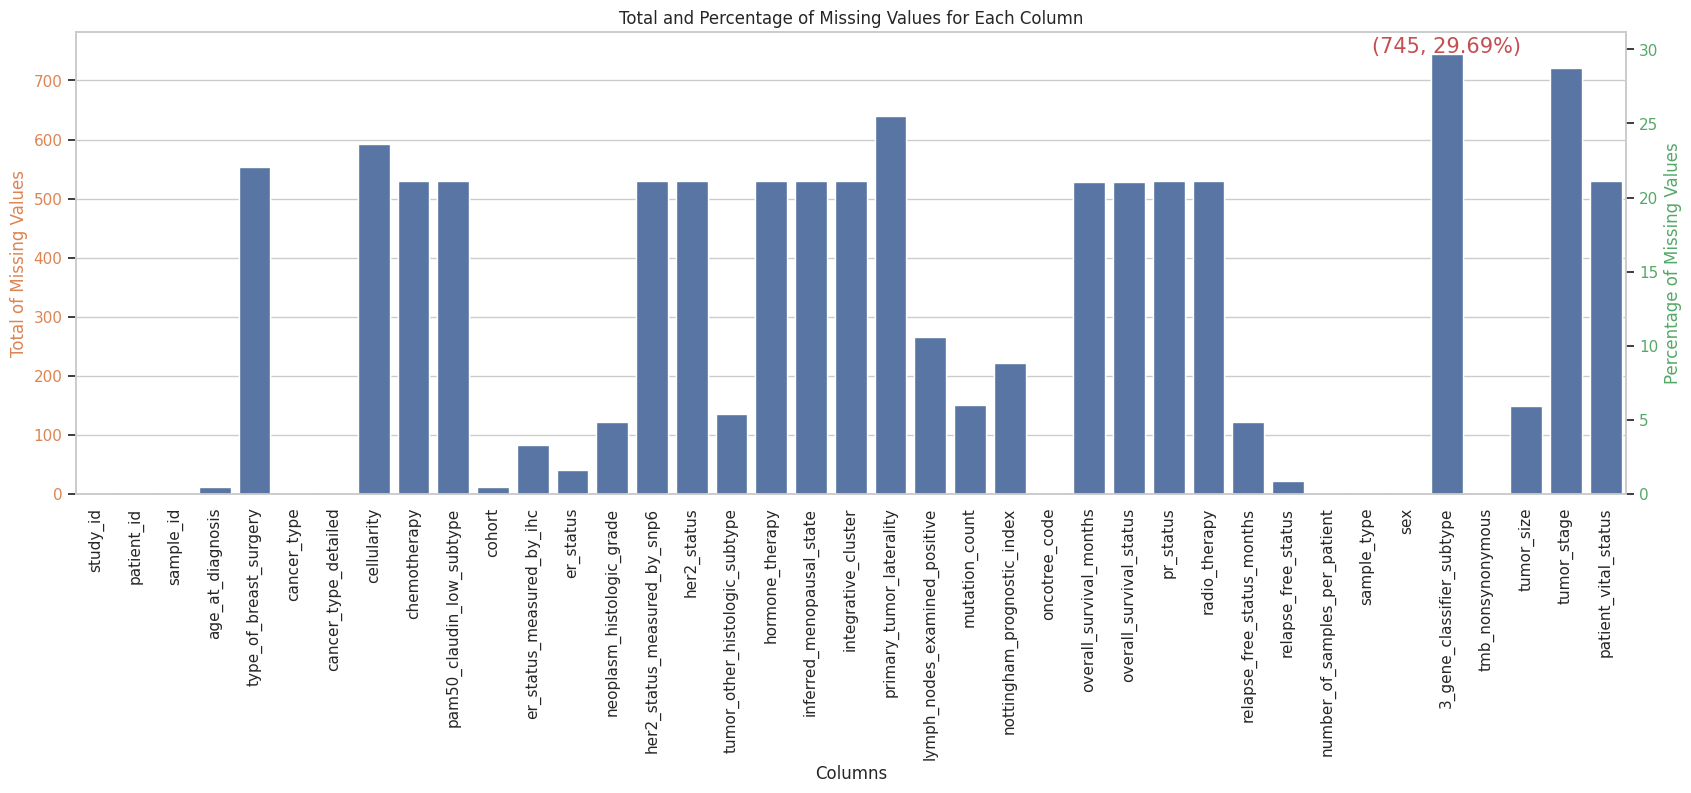

In [110]:
# barchart
sns.set(style="whitegrid")

plt.figure(figsize=(20, 6))
ax = sns.barplot(x=total_missing_data.index, y=total_missing_data, color=sns.color_palette()[0])

# left y-axis (for total missing values)
ax.set_xlabel('Columns')
ax.set_ylabel('Total of Missing Values', color=sns.color_palette()[1])
ax.tick_params(axis='y', labelcolor=sns.color_palette()[1])
ax.set_title('Total and Percentage of Missing Values for Each Column')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_locator(MultipleLocator(100))

# right y-axis (for percentage of missing values)
ax2 = ax.twinx()
sns.barplot(x=missing_perc.index, y=missing_perc, color=sns.color_palette()[0], ax=ax2)
ax2.set_ylabel('Percentage of Missing Values', color=sns.color_palette()[2])
ax2.tick_params(axis='y', labelcolor=sns.color_palette()[2])
ax2.grid(False)

# annotate max values for both axes
for v1, v2 in zip(ax.patches, ax2.patches):
    if v1.get_height() == total_missing_data.max():
        ax2.annotate(f'({int(v1.get_height())}, {v2.get_height():.2f}%)',
                     (v1.get_x() + v1.get_width() / 2., v2.get_height()),
                     ha='center', va='center', xytext=(0, 5), textcoords='offset points', color=sns.color_palette()[3],
                     fontsize=15)  # Adjust the font size as needed

plt.show()

where the missing values are located in rows for each columns

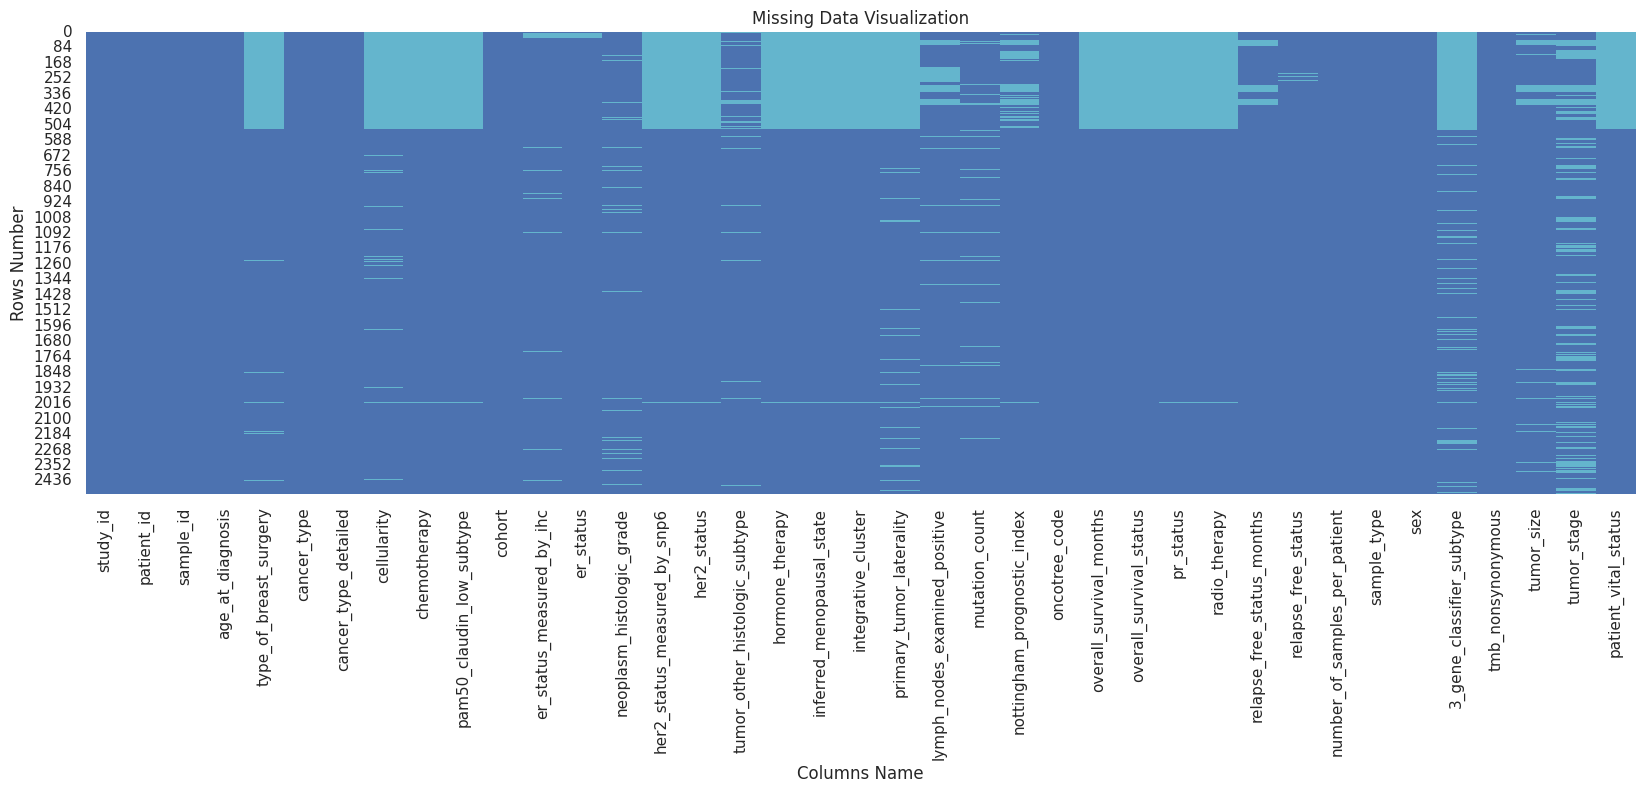

In [112]:
# heatmap
plt.figure(figsize=(20, 6))
ax = sns.heatmap(df.isnull(), cbar=False, cmap=sns.color_palette())

# Add axis titles
ax.set_xlabel("Columns Name")
ax.set_ylabel("Rows Number")

# Add a title
plt.title('Missing Data Visualization')

# Show the plot
plt.show()

handling missing data